---------
# Recovering secret exponent in RSA Straightforward Modular Exponentiation
-------
<img src='images/DoIt.png' style='width: 100px'>

# ONE SOLUTION

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

<img src='images/DoIt.png' style='width: 100px'>

#### Load the trace 'RSA_SSTIC_power_consumption.npz'
from SideSCA-Traces-Public: git clone https://github.com/BeneoLix/SideSCA-Traces-Public.git

#### How to handle a numpy npz file: https://numpy.org/doc/stable/reference/generated/numpy.savez.html
    

In [3]:
trace_npz = np.load('../SideSCA-Traces-Public/RSA_SSTIC_power_consumption.npz')
trace_lst = trace_npz.files

In [4]:
print(trace_lst)

['arr_0']


In [5]:
trace = trace_npz['arr_0']
len(trace)

1842128

In [6]:
trace[0:20]

array([ 0.00387928,  0.05724333, -0.01318807, -0.02729493, -0.02348536,
        0.0465676 ,  0.04035217, -0.01577941, -0.02894039,  0.01174628,
        0.07196697,  0.03027694,  0.00464222,  0.02307723,  0.00593505,
       -0.01687661,  0.05888884, -0.06209962,  0.01097336,  0.01333775])

<img src='images/DoIt.png' style='width: 100px'>

## Plot the trace, zoom, observe and deduce the algorithm here

In [7]:
import matplotlib.pyplot as plt

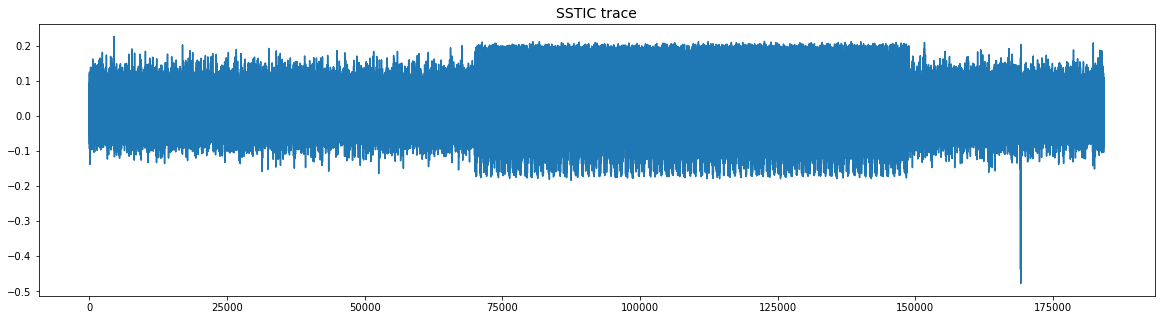

In [8]:
plt.rcParams['figure.figsize'] = 20, 5
plt.title('SSTIC trace', fontsize=14)    
#plt.plot(trace[::10], '.')
plt.plot(trace[::10])
plt.show()

#### You can use backend matplotlib

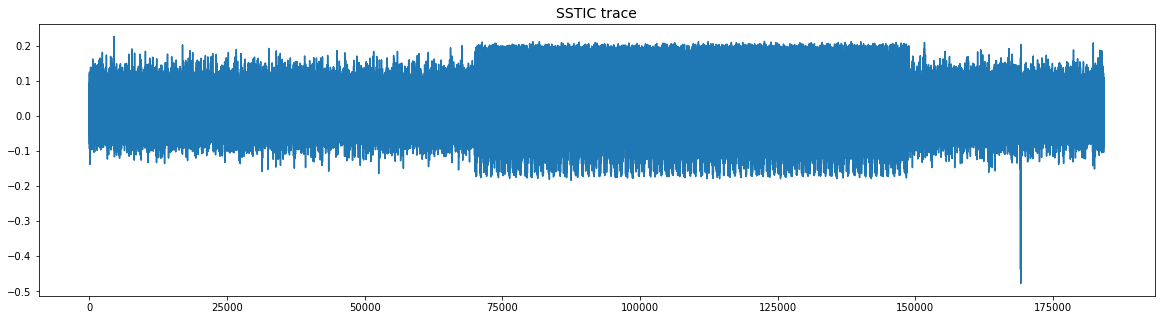

In [9]:
#for plotting outside jupyter notebook
#%matplotlib           
#for plotting inside notebook
#%matplotlib inline    
plt.rcParams['figure.figsize'] = 20, 5
plt.title('SSTIC trace', fontsize=14)    
#plt.plot(trace[::10], '.')
plt.plot(trace[::10])
plt.show()

In [10]:
trace_algo = trace[650000:1600000]

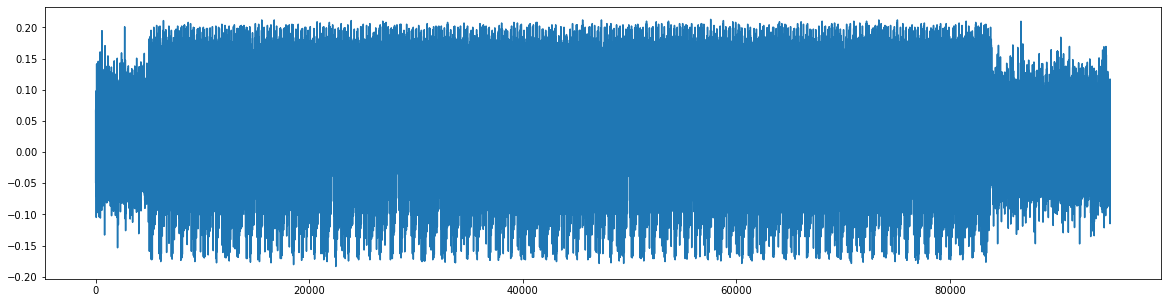

In [11]:
plt.rcParams['figure.figsize'] = 20, 5
plt.plot(trace_algo[::10])
plt.show()

<img src='images/DoIt.png' style='width: 100px'>

## Can you recover the secret exponent ?

#### Indication:

* modulus N = 0xD072DD3F639C2D0E1FF69AB965782F668D7BFFAC766AEEAB5DA84AE373F8C0DCAA18C6BDCBD551BB012F42AFC0F3FC4AAD438C212FF8A4E597053CD60B54AC484714FBAE059C97F8138CEDE9A80060D3C816288FF2C77D82081E586F73EE78E06F69D7D57596ACF1959D6F3ED00D2CDDB11DECF25A379DEF4DCE3B264AD7E819
* public exponent e = 2**16+1 = 65537

#### This information is enough to validate the secret exponent you would have recovered.

-------
The information below is additional information in case you do not see how to use only the modulus and the public exponent knowledge for the validation of your finding.

------------

plain = 0x17751699e1fdcf36867e12ce89739596ccc41adaf3cae6c277e37fdd87858d98aa565ca94e8ff15329f3fa05eea43700
f4981b0dc46f33f4df6f0e58f43e5872bad8a82523c4771b6057a961ea318797b9c237f458a48eb8aa80b9019d7e37a72a41abb948
76c5bc4804d6479a35771992dfeffc98f51f61aab9625c7e6fe344

cipher = pow(plain, e, N) 0x488cc043393414298f7ee857c5067150d3896408fecbadb21f57749b6d7a470e0e57679d304993f0543301142e075
9f84712891d24917568f58e66b8d8a1ee153dcd12df260b1869d3c5a60c9226edd5418aff385719264a6ca38bb916103903901f9b80
a3260c46bed8c26ea42411023d78987668b9ae5d8f9be2137e9db140

## You must have as result:

$$ cipher^{recovered\_exponent\_d} = plain$$

You must count 1024 operations/peaks, so not 1024+512 as we would expect from a classical Square&Multiply algorithm.

So let's suppose:
- the higher peaks are squaring+multiplication
- the lower peaks are only squaring

or the reverse situation.

---------

### Reminder
<img src='images/RtoL_LtoR_modExpos.png' style='width: 1200px'>

<img src='images/DoIt.png' style='width: 100px'>

## Secret recovery is starting ...

We are performing signal processing on the trace to reduce the number of points, to have a trace with better and simpler observation possibility.

We have a single trace, no possibility for vertical processing in several traces.

#### Then we perform horizontal treatment, for instance moving average with different window size.

In [12]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [13]:
trace_short = trace_algo[40000:80000]

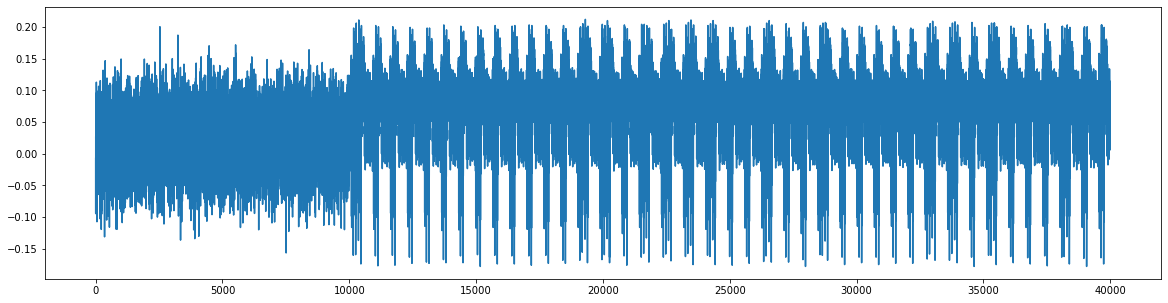

In [14]:
plt.plot(trace_short)
plt.show()

In [21]:
trace_mov_mean = moving_average(trace_short, 500)

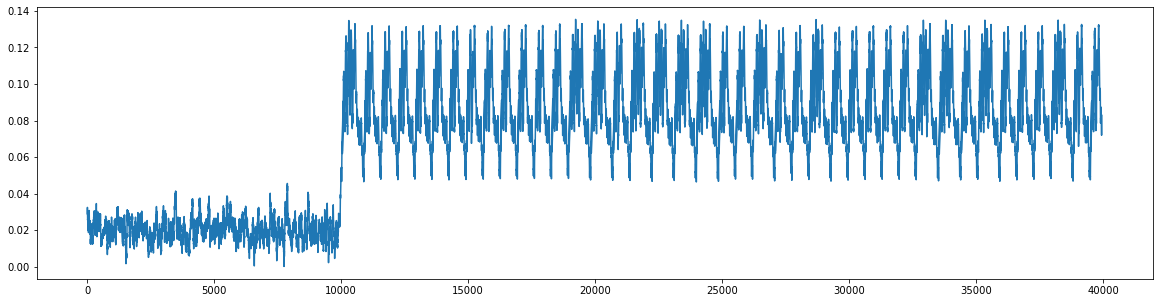

In [20]:
plt.plot(trace_mov_mean)
plt.show()

#### Let zoom in the exponentiation loop

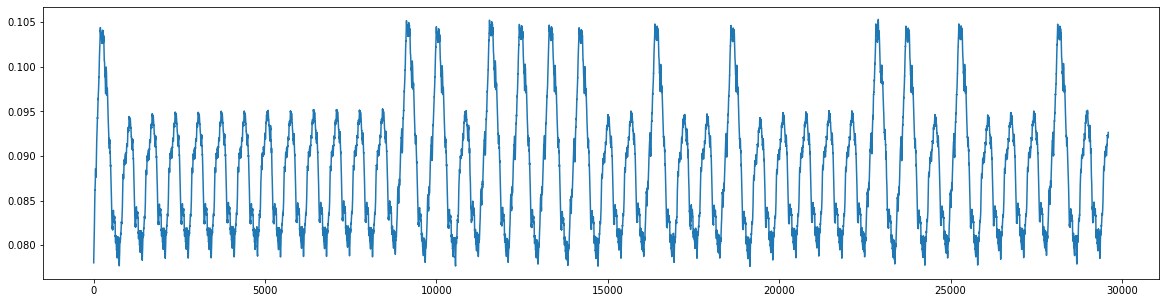

In [17]:
from_pt = 9900
plt.plot(trace_mov_mean[from_pt:])
plt.show()

We observe two catgories of waveforms in the exponentiation.
Knowing a modular exponentiation is a loop of squaring and multiplication operations it might mean this signal processing allows to distinguish these operations???

Now let's count the number of operations to deduce more information on the implementation we are facing here.

On the post processed trace with moving average we could use a `find_peak` function to enumerate and count exactly the number of operations performed.

scipy offers such a `find_peak function`:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

In [18]:
from scipy.signal import find_peaks

In [19]:
peaks, _ = find_peaks(trace_mov_mean, height= 0.08, distance=500)
print(peaks)
len(peaks)

[10094 10938 11609 12280 12951 13622 14291 14991 15644 16315 16986 17657
 18328 19026 19897 20768 21448 22319 23190 24061 24905 25576 26274 27145
 27795 28493 29337 30008 30679 31350 32021 32790 33599 34443 35141 35985
 36656 37327 38025 38896 39480]


41

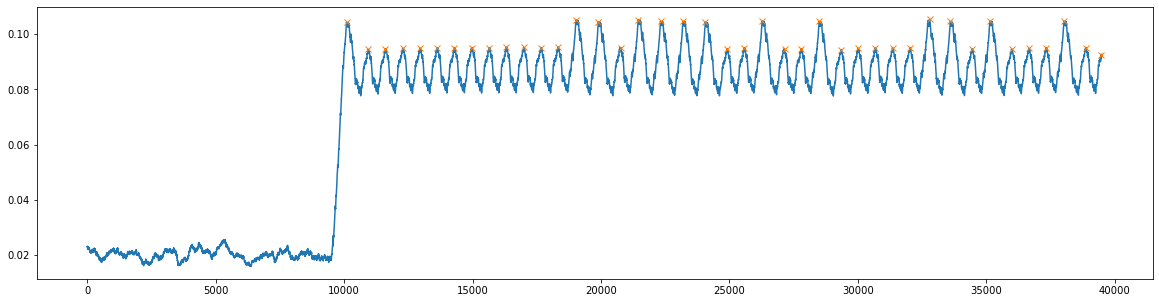

In [20]:
plt.plot(trace_mov_mean)
plt.plot(peaks, trace_mov_mean[peaks], "x")
plt.show()

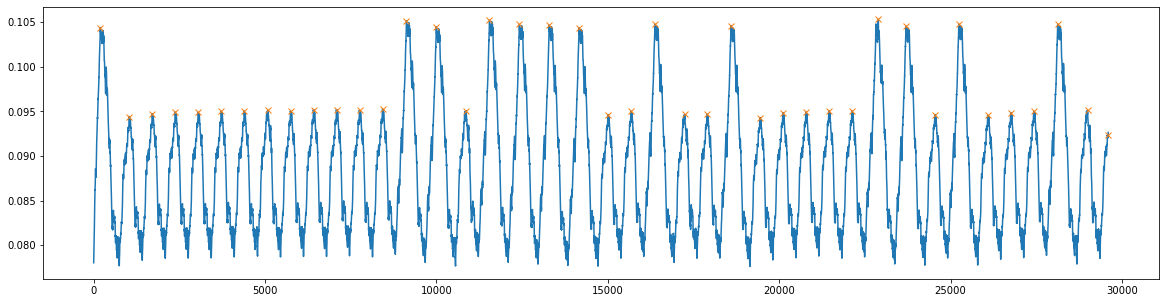

In [21]:
from_pt = 9900
plt.plot(trace_mov_mean[from_pt:])
plt.plot(peaks-from_pt, trace_mov_mean[from_pt:][peaks-from_pt], "x")
plt.show()

[ 50094  50938  51609 ... 837002 837846 838544]
Number of peaks found = 1024


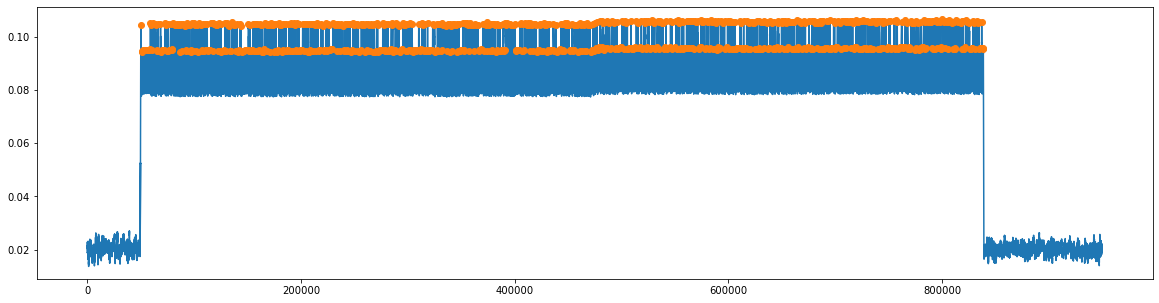

In [22]:
trace_mov_mean = moving_average(trace_algo, 500)
peaks, _ = find_peaks(trace_mov_mean, height= 0.08, distance=500)
peaks
print(peaks)
print("Number of peaks found = "+str(len(peaks)))
plt.plot(trace_mov_mean)
plt.plot(peaks, trace_mov_mean[peaks], 'C1o')
plt.show()

<img src='images/DoIt.png' style='width: 100px'>


We have 1024 peaks for a 1024-bit RSA !

It is not 1024+512 as we would expect from a classical Square&Multiply algorithm but we keep the faith as such 2 classes of patterns cannot be a hasard.

So let's suppose that:
- the higher peaks are squaring+multiplication
- the lower peaks are only squaring

So let's classify the operations in two categories, we built a list of 0/1 values corresponding to square+multiplication/squaring or the opposite.

#### Then we will have secret exponent candidate values to test.

In [23]:
exposant_right_left = 0
exposant_left_right = 0
for i in range(len(peaks)):
    if (trace_mov_mean[peaks[i]] > 0.1): 
        exposant_right_left += pow(2, i) 
        exposant_left_right += pow(2, (len(peaks)-1-i))

In [24]:
print("Exponent candidate from right to left is:\n"+hex(exposant_right_left))
int.bit_length(exposant_right_left)

Exponent candidate from right to left is:
0x23d87cdf97bb95abe6273c384190c765f552ab86f6de30a8db74435c95e6e3138f54af689812d8f9359cf0f4d453a0c11ec68ce470216c09e74c8947adaf23e902415d61ddf2c0ffe459cbb40f7de42bdb7cd14093100a570e8c29819765e2d8d276f86471b52ac29aa2ce2bb72cd45006279e82bec253ae9675fe45824f6001


1022

In [25]:
print("Exponent candidate from left to right is:\n"+hex(exposant_left_right))
int.bit_length(exposant_left_right)

Exponent candidate from left to right is:
0x8006f241a27fae6975ca437d4179e4600a2b34edd47345594354ad8e261f6e4b1b47a6e981943170ea5008c9028b3edbd427bef02dd39a27ff034fbb86ba824097c4f5b5e29132e79036840e273163788305ca2b2f0f39ac9f1b481916f52af1c8c767a93ac22edb150c7b6f61d54aafa6e309821c3ce467d5a9dde9fb3e1bc4


1024

In [26]:
#modulus N from SSTIC reverse is
N = 0xD072DD3F639C2D0E1FF69AB965782F668D7BFFAC766AEEAB5DA84AE373F8C0DCAA18C6BDCBD551BB012F42AFC0F3FC4AAD438C212FF8A4E597053CD60B54AC484714FBAE059C97F8138CEDE9A80060D3C816288FF2C77D82081E586F73EE78E06F69D7D57596ACF1959D6F3ED00D2CDDB11DECF25A379DEF4DCE3B264AD7E819

In [27]:
int.bit_length(N)

1024

## Tests the exponent recovered

In [28]:
import random

In [29]:
def test_exponent_found(e, d):
    plaintext = random.randint(1, 2**1021)
    ciphertext = pow(plaintext, e, N)
    recovered_ptxt = pow(ciphertext, d, N)
    if (recovered_ptxt==plaintext): 
        print("found - success")
        bool_answer = True
    else:
        print("not found - fail")
        bool_answer = False
        
    return bool_answer

In [30]:
e = 2**16+1

In [31]:
result = test_exponent_found(e, exposant_left_right)

not found - fail


In [32]:
result = test_exponent_found(e, exposant_right_left)

found - success


# Conclusion
#### Exponent is recovered from the side-channel trace given in this challenge.

In [33]:
print("Exponent recovered is:\n"+hex(exposant_right_left))

Exponent recovered is:
0x23d87cdf97bb95abe6273c384190c765f552ab86f6de30a8db74435c95e6e3138f54af689812d8f9359cf0f4d453a0c11ec68ce470216c09e74c8947adaf23e902415d61ddf2c0ffe459cbb40f7de42bdb7cd14093100a570e8c29819765e2d8d276f86471b52ac29aa2ce2bb72cd45006279e82bec253ae9675fe45824f6001
